In [2]:
% git

UsageError: Line magic function `%` not found.


In [1]:
import geopandas
import rasterio
import matplotlib.pyplot as plt
import gdal
import numpy as np
from osgeo import gdal
from osgeo import ogr
from osgeo import gdalconst
#import shapefile as shp

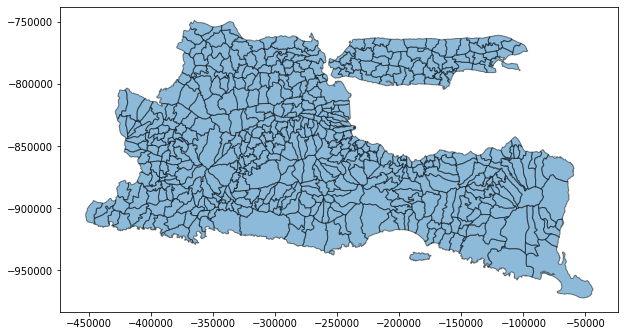

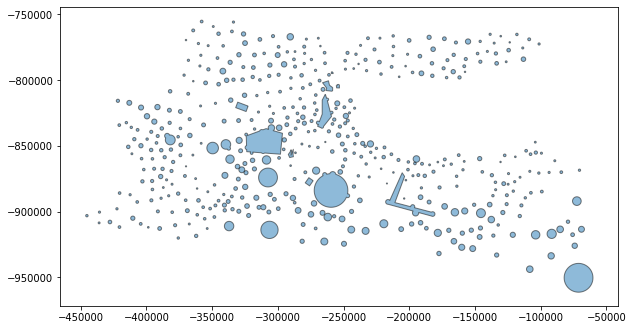

In [2]:
EjSpP = '.\Data\EastJava_Kec.shp'
EjSp = geopandas.read_file(EjSpP)
EjSp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
BuiltUpSpP = '.\Data\Kec_buffer.shp'
BuiltUpSp = geopandas.read_file(BuiltUpSpP)
BuiltUpSp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [114]:
type(EjSp)

geopandas.geodataframe.GeoDataFrame

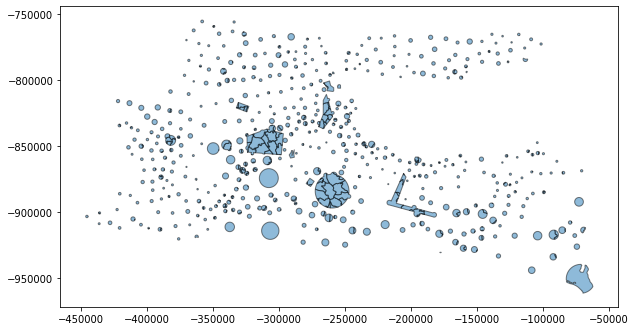

In [109]:
bp = 'BuiltData.shp'
bp = geopandas.read_file(bp)
bp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [108]:
bp

,POP_CHANGE,POP_1961,geometry
0,-1267.501495,39111,"POLYGON ((-135940.573 -872226.271, -135945.920..."
1,7574.694572,96843,"POLYGON ((-90700.944 -913627.203, -90660.590 -..."
2,-6101.464974,96131,"MULTIPOLYGON (((-72482.540 -895391.748, -72533..."
3,13530.970550,101946,"POLYGON ((-103848.879 -920945.480, -103899.490..."
4,3503.158339,73514,"MULTIPOLYGON (((-83008.146 -912381.202, -83103..."
...,...,...,...
484,-2422.759699,37161,"MULTIPOLYGON (((-108773.517 -770118.628, -1088..."
485,-910.899266,28555,"POLYGON ((-101241.907 -773409.553, -101267.836..."
486,-10769.148630,64564,"MULTIPOLYGON (((-327955.110 -866094.394, -3279..."
487,-5109.263736,42924,"MULTIPOLYGON (((-323453.595 -869107.904, -3234..."


In [98]:
BuiltUpSp = BuiltUpSp[['OBJECTID','geometry']]
type(BuiltUpSp)# BuiltUpSp = BuiltUpSp.iloc[:,1:2])

geopandas.geodataframe.GeoDataFrame

In [102]:
BuiltData = geopandas.overlay(EjSp, BuiltUpSp, how='intersection')


In [105]:
BuiltData = BuiltData[['POP_CHANGE','POP_1961','geometry']]

In [203]:
BuiltData.plot()

AttributeError: 'DataSource' object has no attribute 'plot'

In [111]:
BuiltData.to_file('BuiltData.shp')

In [5]:
import gdal
from osgeo import osr
from osgeo import ogr

raster_path = 'BuiltData.tif'
shapefile = 'BuiltData.shp'
# 1) opening the shapefile    
source_ds = ogr.Open(shapefile)
source_layer = source_ds.GetLayer()

# 2) Creating the destination raster data source
pixelWidth = pixelHeight = 100 # depending how fine you want your raster ##COMMENT 1
x_min, x_max, y_min, y_max = source_layer.GetExtent()
cols = int((x_max - x_min) / pixelHeight)
rows = int((y_max - y_min) / pixelWidth)


In [111]:
target_ds = gdal.GetDriverByName('GTiff').Create(raster_path, cols, rows, 1,  gdal.GDT_Float64) ##COMMENT 2


In [57]:
target_ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001DBC9948E10> >

In [110]:
target_ds.SetGeoTransform((x_min, pixelWidth, 0, y_max, 0, -pixelHeight))
band = target_ds.GetRasterBand(1)
NoData_value = -99
burnVal = 0
band.SetNoDataValue(NoData_value)
band.FlushCache()
gdal.RasterizeLayer(target_ds, [1], source_layer,burn_values=[burnVal] )#options=["ATTRIBUTE=POP_CHANGE"])

AttributeError: 'NoneType' object has no attribute 'SetGeoTransform'

In [99]:
target_ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001DBCD1F4540> >

In [100]:
target_ds = None

In [ ]:
RasterXSize = 3000
RasterYSize = 2000

In [101]:
rb.GetDataset( )

NameError: name 'rb' is not defined

In [132]:
from scipy import ndimage

In [3]:
raster_path

NameError: name 'raster_path' is not defined

In [246]:
rs = gdal.Open('.\Data\PopBDtif.tif')
rs = gdal.Open('.\Data\popcbdden.tif')
rs = gdal.Open('.\Data\popbdden.tif')
popcbdden



In [412]:
rs = gdal.Open('.\Data\popbdden.tif')
rs.GetProjection()

'PROJCS["WGS_1984_Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",115],PARAMETER["standard_parallel_1",2],PARAMETER["standard_parallel_2",-7],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [253]:
type(rs.GetRasterBand(1))
a = rs.GetRasterBand(1)

In [436]:
img = rs.ReadAsArray()/100   # rectifiy unit.    by doing this, total population is correct

In [265]:
img = np.where(img==-65535, np.NaN, img) 

In [485]:
img = np.where(img<-0, 0, img) 
img = np.int16(img)

In [488]:
img.sum()/totalp

0.9885919146828435

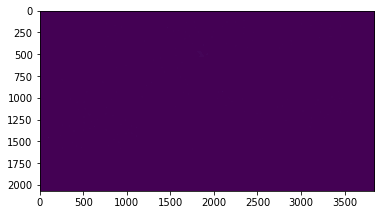

In [445]:
imgplot2 = plt.imshow(img)
plt.show()

In [489]:
totalp = img.sum()
totalp

21307948

In [443]:
img_b = img.copy()

In [510]:
img_b = np.int16(img_b)

In [509]:
img.sum()

21307948

In [490]:
totalp

21307948

In [ ]:
after_erosion = ndimage.binary_erosion(binary_image, iterations=3)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(binary_image, cmap='gray')
ax1.set_title("Before Erosion")

ax2.imshow(after_erosion, cmap='gray')
ax2.set_title("After Erosion")

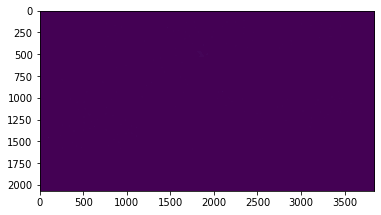

In [511]:
img = img_b.copy()
plt.imshow(img)

In [512]:
(1/img.sum())*totalp

1.0

In [435]:
np.where(np.isnan(img),300, img)

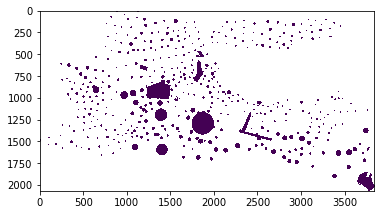

In [513]:
plt.imshow(np.where(img==0,np.NaN, img))

In [514]:
# binary_dilation with original value
# img is a imgage where -9999 stand for NaN values
imgbw = img  > 0 # binary image 
#img =np.where(img==-9999, np.NaN, img)                       # reorganize img

In [515]:
imgbw_ex = ndimage.binary_dilation(imgbw, iterations = 1)  # expansion first
imgbw_ring = imgbw_ex > imgbw                               # detect the changes ....

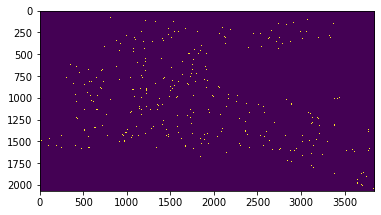

In [516]:
plt.imshow(imgbw_ring)

In [517]:
img.sum()

21307948

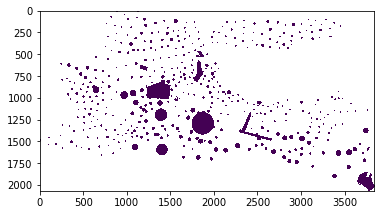

In [518]:
img =np.where(img==0, np.NaN, img)  
plt.imshow(img)

In [519]:
# binary_dilation with original value
for m in range(60):
    index = np.where(imgbw_ring)
    length = len(index[0])
    index[0][100]
    for u in range(length):
            i = index[0][u]
            j = index[1][u]
            if i == sizeY-1 or j == sizeX-1:
                if not np.isnan(img[i-1,j]):
                    img[i,j] = img[i-1,j]
                elif not np.isnan(img[i,j-1]):
                    img[i,j] = img[i,j-1]
            elif   i== 0 or j == 0:
                if not np.isnan(img[i+1,j]): 
                    img[i,j] = img[i+1,j] 
                elif not np.isnan(img[i,j+1]):
                    img[i,j] = img[i,j+1]             
            else:
                if not np.isnan(img[i+1,j]): 
                    img[i,j] = img[i+1,j] 
                elif not np.isnan(img[i,j+1]):
                    img[i,j] = img[i,j+1] 
                elif not np.isnan(img[i-1,j]):
                    img[i,j] = img[i-1,j]
                elif not np.isnan(img[i,j-1]):
                    img[i,j] = img[i,j-1] 
    imgbw =  np.where(np.isnan(img),0, img)  > 0
    imgbw_ex = ndimage.binary_dilation(imgbw, iterations = 1)  # expansion first
    imgbw_ring = imgbw_ex > imgbw         

0 40233
1 41780
2 43446
3 45156
4 46854
5 48536
6 50113
7 51674
8 53256
9 54789
10 56307
11 57818
12 59244
13 60642
14 62064
15 63311
16 64442
17 65559
18 66682
19 67706
20 68705
21 69360
22 69999
23 70519
24 70854
25 71096
26 71012
27 70827
28 70638
29 70153
30 69465
31 68736
32 68117
33 67553
34 66930
35 66293
36 65605
37 64842
38 63891
39 63012
40 62093
41 61298
42 60227
43 59122
44 58153
45 57169
46 56047
47 54890
48 53945
49 52539
50 51181
51 50317
52 49247
53 47645
54 46336
55 45088
56 43604
57 42306
58 41255
59 40273


In [523]:
 img = np.where(np.isnan(img), 0, img)   # must do, to make sure 0 is replaced by NaN

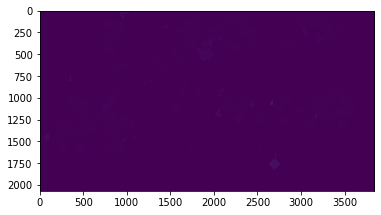

In [538]:
plt.imshow(img)

In [528]:
(img / img.sum()*totalp) .sum()

21307947.999999985

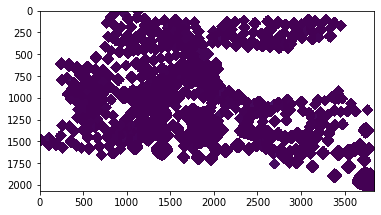

In [532]:
imgt= img / img.sum()*totalp
imgt = np.where(img==0, np.NaN, img)
plt.imshow(imgt)

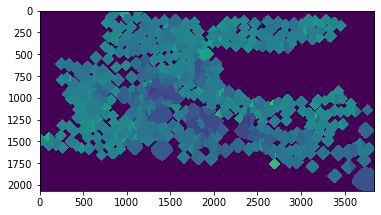

In [659]:
plt.imshow(np.log(img+1))

In [572]:
# maintain the same value, iteration for more than 40 times...
img_boundary_base = img.copy()   # the base map for future analysis....
for i in range(sizeY-1):
    for j in range(sizeX-1):
        if img[i,j] == 0:
            continue
        elif   img[i,j] != img[i+1,j]:
            img_boundary_base[i,j] = 0
        elif img[i,j] != img[i,j+1]:
            img_boundary_base[i,j] = 0

In [670]:
img_boundary_t = img_boundary_base

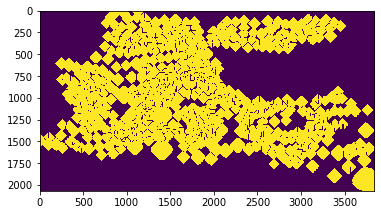

In [669]:
img_boundary_t = ndimage.binary_erosion(img_boundary_t>0, iterations=1)
plt.imshow(img_boundary_t)
# img_boundary is the final boundary map that we are going to lay on our result

In [671]:
img_index = img_binary>img_boundary_t

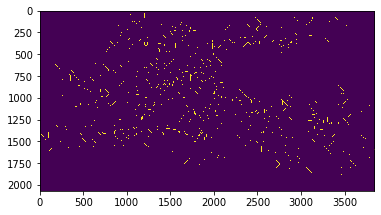

In [672]:
plt.imshow(img_index)

In [673]:
(img_binary>img_boundary_t).sum()

102677

In [583]:
(img_boundary_t>img_binary).sum()

0

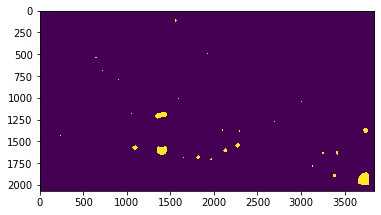

In [562]:
plt.imshow(img_core)

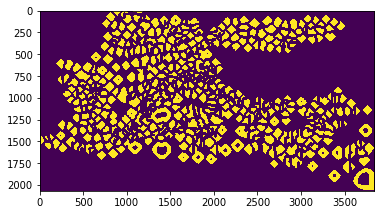

In [564]:
img_analysis_ring = img_boundary > img_core  # the part that we care about.....
plt.imshow(img_analysis_ring)

316197758.0

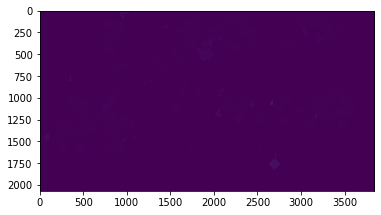

In [662]:
plt.imshow(img_smooth)
img.sum()

In [677]:
img.var()
#img_smooth.var()

9827.165213599395

In [661]:
index

(array([   0,    0,    0, ..., 2067, 2067, 2067], dtype=int64),
 array([ 817,  818,  819, ..., 3839, 3840, 3841], dtype=int64))

In [717]:
# smoothing the value
img_smooth = img.copy()
method_smooth = 'slow'
img_boundary_t = img_boundary_base
img_binary = img>0
coresize = 55 # the heterogineous core that have a same population density
img_core = ndimage.binary_erosion(img_boundary>0, iterations= 60 - coresize)

if coresize <50:
    raise("dangerous, super slow")

for m in range(60 - coresize):

    img_boundary_t = ndimage.binary_erosion(img_boundary_t>0, iterations=1)
    img_index = img_binary>img_boundary_t
    index = np.where(img_index)
    length = len(index[0])
    print(length)

    for u in range(length):
        i = index[0][u]
        j = index[1][u]
        if i <= 0 or j <= 0:
            continue
        elif i >= sizeY-1 or j >= sizeX-1:
            continue
        else:
            temp_9 =  img_smooth[i-1:i+2,j-1:j+2]    #img_smooth[i,  j],
            if img_smooth[i,j] - temp_9.mean() < 5:
                continue
            elif method_smooth == 'slow':
                img_smooth[i,j] = temp_9.mean()
            elif method_smooth == 'fast':
                img_smooth[i,j] = img_smooth[i,j]    + ((temp_9.max() - img_smooth[i,j])*0.4  
                                                     + (temp_9.min() - img_smooth[i,j])*0.4   )
        

267379
426771
581210
730621
875589
1016413
1153423
1286494
1415596
1540810


In [697]:
# an example about...
import scipy.ndimage as ndimage

def test_func(values):
    print(values)
    return values.sum()
x = np.array([[1,2,3],[4,5,6],[7,8,9]])

footprint = np.array([[1,1,1],
                      [1,0,1],
                      [1,1,1]])

results = ndimage.generic_filter(x, test_func, footprint=footprint)

[1. 1. 2. 1. 2. 4. 4. 5.]
[1. 2. 3. 1. 3. 4. 5. 6.]
[2. 3. 3. 2. 3. 5. 6. 6.]
[1. 1. 2. 4. 5. 7. 7. 8.]
[1. 2. 3. 4. 6. 7. 8. 9.]
[2. 3. 3. 5. 6. 8. 9. 9.]
[4. 4. 5. 7. 8. 7. 7. 8.]
[4. 5. 6. 7. 9. 7. 8. 9.]
[5. 6. 6. 8. 9. 8. 9. 9.]


In [723]:
# how to find the settlement ...
img_core = img_boundary>0 img_smooth = (img_smooth * (img_boundary_base>0))

298019864.955356

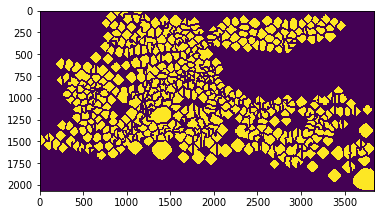

In [727]:
# smooth the population
coresize = 50 # the heterogineous core that have a same population density
img_core = ndimage.binary_erosion(img_boundary>0, iterations= 60 - coresize)

plt.imshow(img_core)

In [762]:
t = img_smooth * img_core
img_new = t/t.sum()*totalp
print(totalp)

21307948


In [754]:
img_new = np.int8(img_new+1)
img_new = np.where(img_new<1,0,img_new)
img_new = img_new/img_new.sum()*totalp
img_new.sum()

21307948.00000002

In [770]:
img_new.min()

0.0

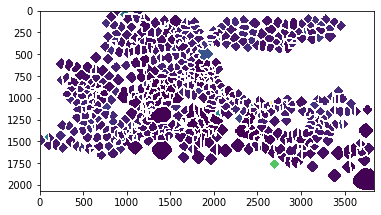

In [766]:
plt.imshow(np.where(img_new==0,np.NaN,img_new))

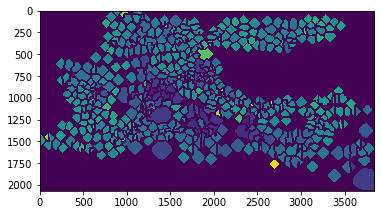

In [771]:
plt.imshow(np.log(img_new+1))

In [765]:
img_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

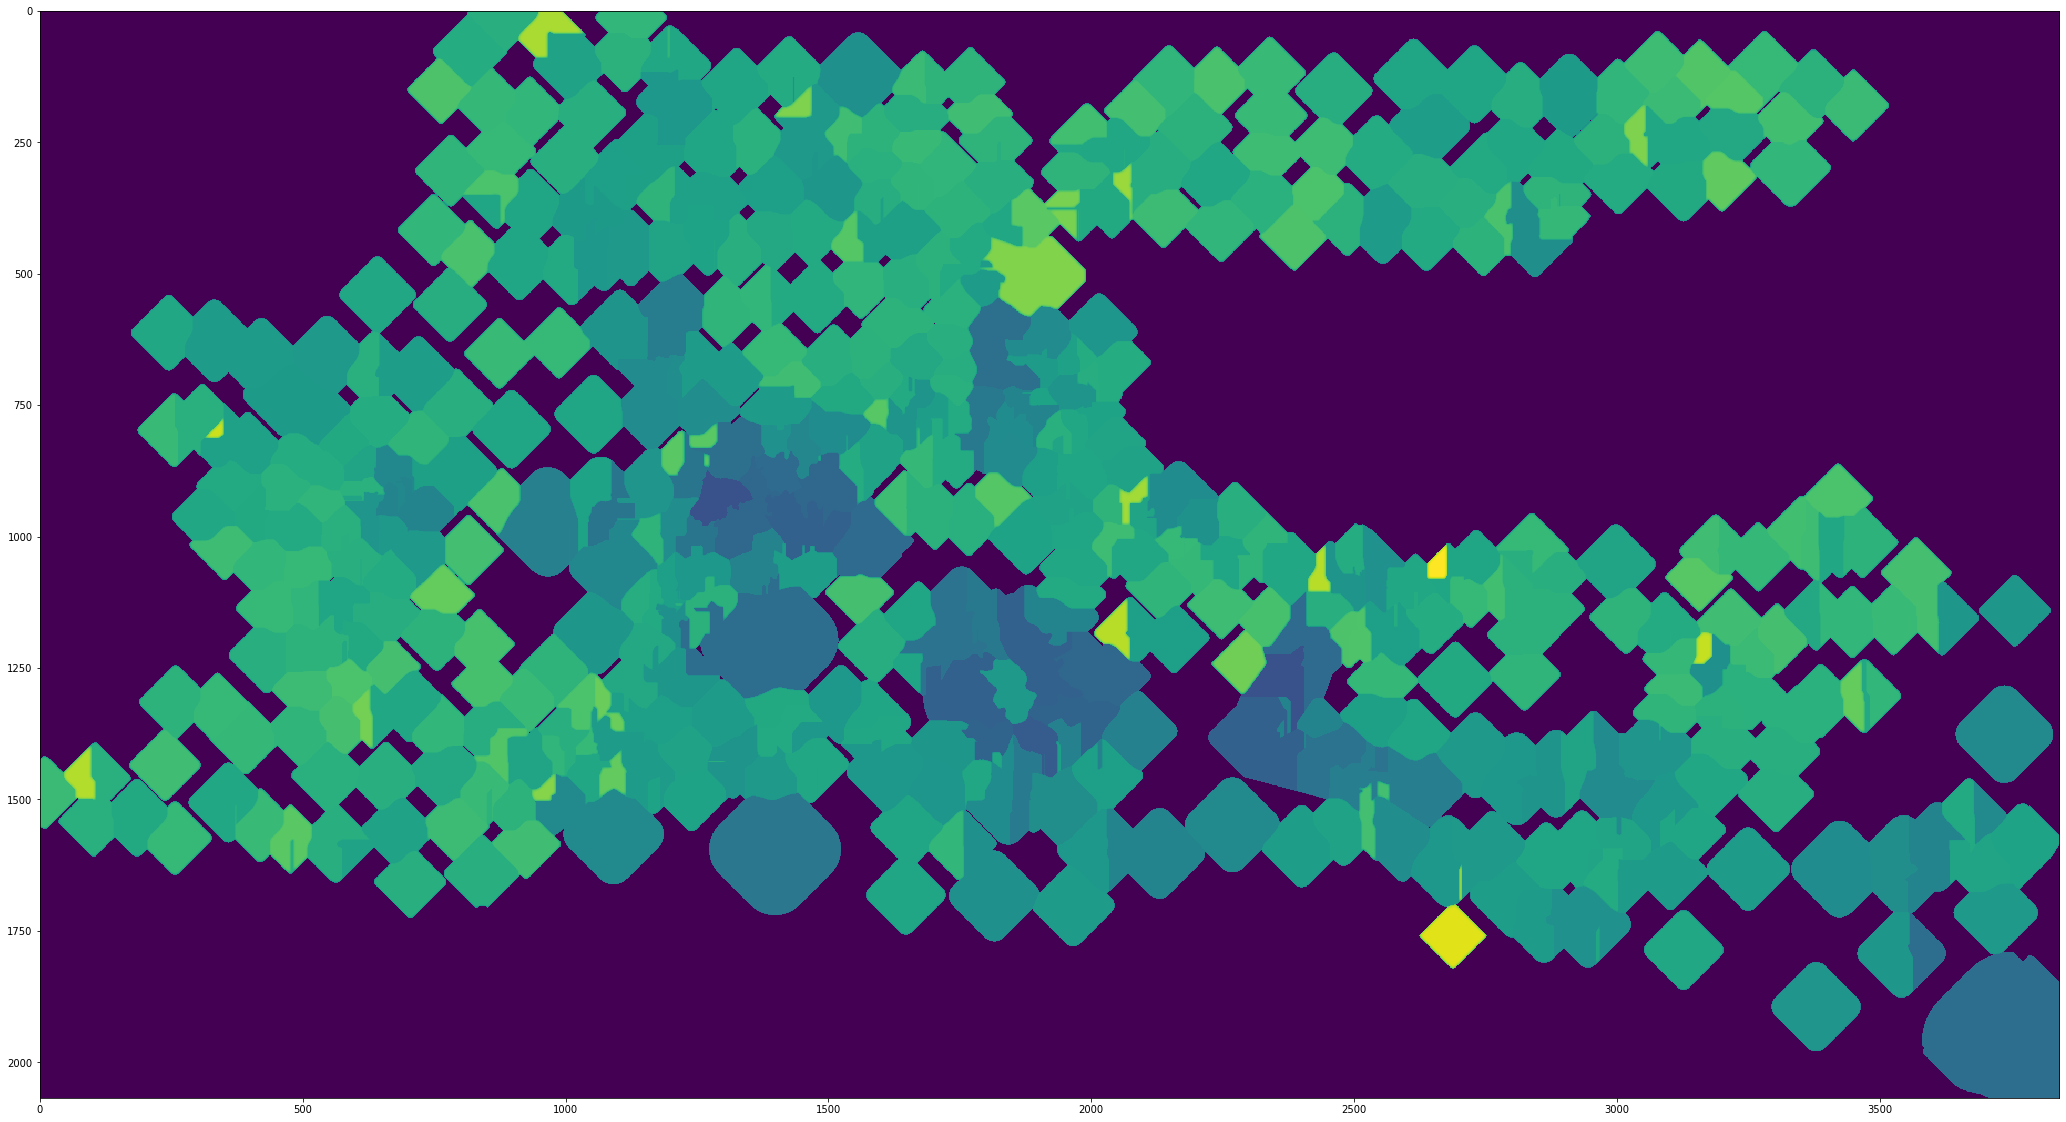

In [718]:
plt.figure(figsize = (200,20))
plt.imshow(np.log(img_smooth+1))

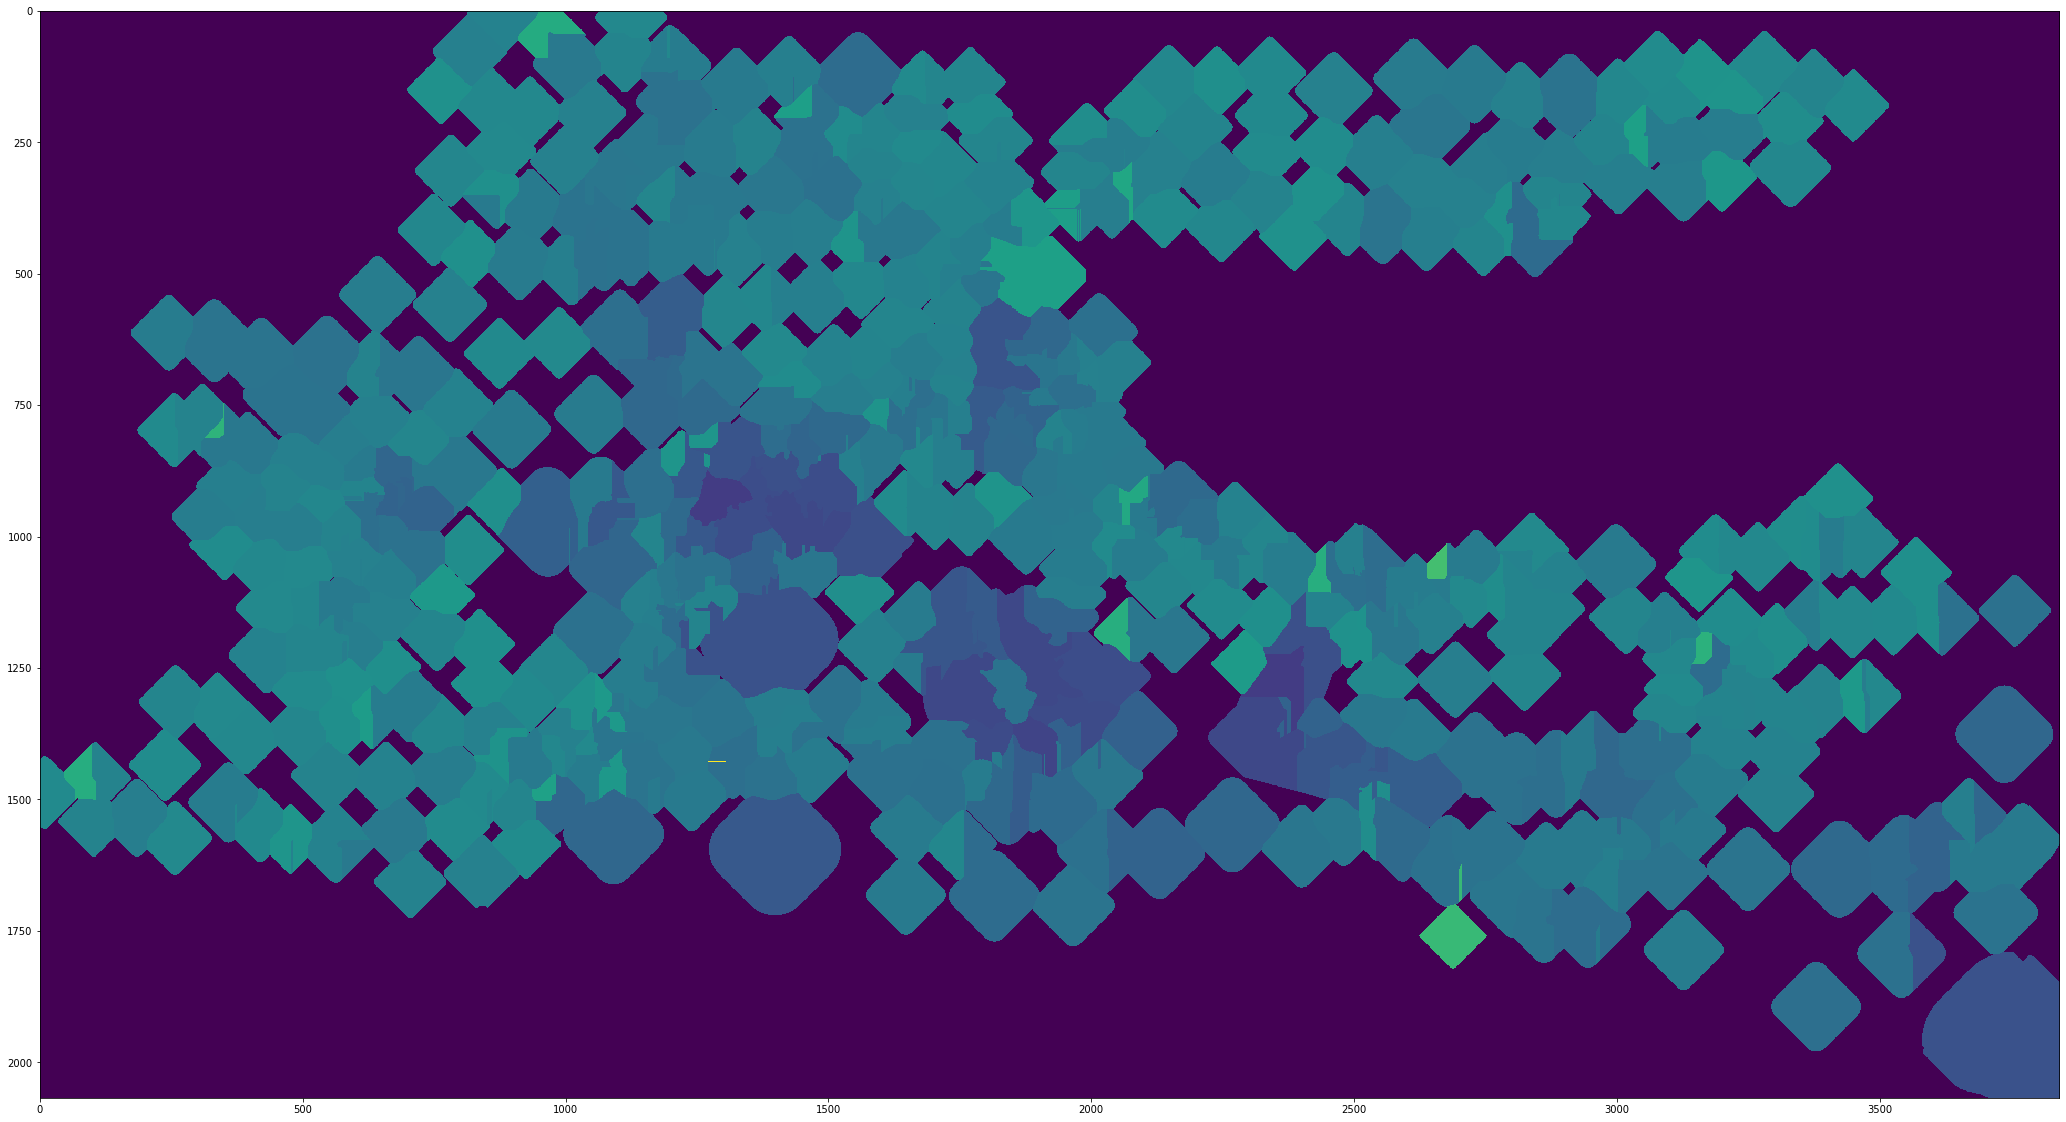

In [693]:
plt.figure(figsize = (200,20))
plt.imshow(np.log(img+1))

In [624]:
            temp_9 =   np.array( [img_smooth[i-1,j-1],   img_smooth[i-1,j],   img_smooth[i-1,j+1] ,
                                  img_smooth[i,  j-1],                          img_smooth[i  ,j+1],
                                  img_smooth[i+1,j-1],   img_smooth[i+1,j],   img_smooth[i+1,j+1]])

In [652]:
img_smooth[i,j]    + (temp_9.max() - img_smooth[i,j])*0.4 
+          (temp_9.min() - img_smooth[i,j])*0.4  

-44.800000000000004

In [667]:
img_smooth.sum()

309897741.1700547

In [649]:
temp_9 = np.array([12,4000,-100,3,13,3,3,3])

In [85]:
#binary
biimg = img>0 # biimg is binary image nd arrary...

In [130]:
bw = ndimage.binary_dilation(biimg, iterations = 60)  # expansion first

In [ ]:
# big split
for i in range(sizeY-1):
    for j in range(sizeX-1):
        if   img[i,j] != img[i+1,j]:
            img[i,j] = -999
        elif img[i,j] != img[i,j+1]:
            img[i,j] = -999

In [120]:
after_erosion = ndimage.binary_erosion(biimg, iterations=10)


Text(0.5, 1.0, 'After Erosion')

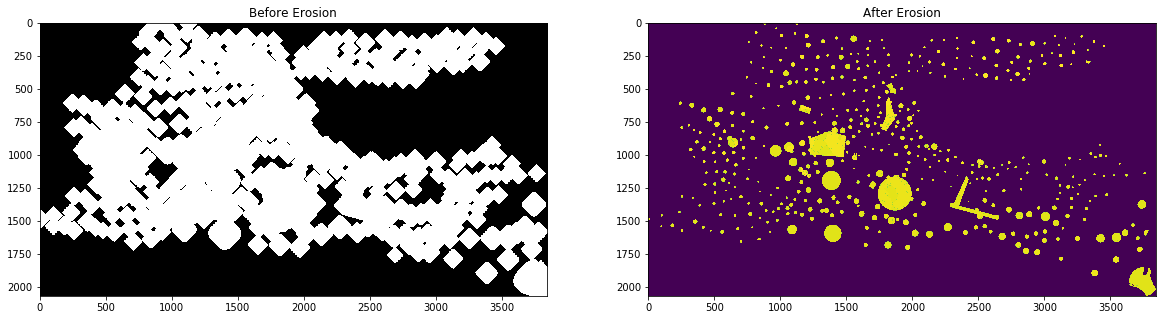

In [138]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(bw, cmap='gray')
ax1.set_title("Before Erosion")

ax2.imshow(img,)# cmap='gray')
ax2.set_title("After Erosion")

In [141]:
# split +
a = bw+img

In [146]:
a

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9998., -9998., -9998.],
       [-9999., -9999., -9999., ..., -9998., -9998., -9998.],
       [-9999., -9999., -9999., ..., -9998., -9998., -9998.]])